In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
import warnings
df = pd.read_csv('Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2]:
df.shape

(9240, 37)

In [3]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [4]:
def MAUV(df):
    print('Missing values & Unique Values')
    for col in df.columns:
        arr = df[col]
        bool_arr = pd.isnull(arr)
        cnt = 0
        for i in range(len(arr)):
            if bool_arr[i] == True:
                cnt = cnt + 1
        lst = df[col].unique()
        print(col,cnt,len(lst))
MAUV(df)

Missing values & Unique Values
Prospect ID 0 9240
Lead Number 0 9240
Lead Origin 0 5
Lead Source 36 22
Do Not Email 0 2
Do Not Call 0 2
Converted 0 2
TotalVisits 137 42
Total Time Spent on Website 0 1731
Page Views Per Visit 137 115
Last Activity 103 18
Country 2461 39
Specialization 1438 20
How did you hear about X Education 2207 11
What is your current occupation 2690 7
What matters most to you in choosing a course 2709 4
Search 0 2
Magazine 0 1
Newspaper Article 0 2
X Education Forums 0 2
Newspaper 0 2
Digital Advertisement 0 2
Through Recommendations 0 2
Receive More Updates About Our Courses 0 1
Tags 3353 27
Lead Quality 4767 6
Update me on Supply Chain Content 0 1
Get updates on DM Content 0 1
Lead Profile 2709 7
City 1420 8
Asymmetrique Activity Index 4218 4
Asymmetrique Profile Index 4218 4
Asymmetrique Activity Score 4218 13
Asymmetrique Profile Score 4218 11
I agree to pay the amount through cheque 0 1
A free copy of Mastering The Interview 0 2
Last Notable Activity 0 16


In [5]:
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df[['Lead Source','Last Activity']])
df[['Lead Source','Last Activity']] = impute_mode.transform(df[['Lead Source','Last Activity']])
df_cleaned = df.drop(['Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','City'],axis=1)

In [6]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import BayesianRidge
# predictor_vars = ['TotalVisits', 'Total Time Spent on Website']
# missing_vars = ['Page Views Per Visit']
# imputer = IterativeImputer(estimator=BayesianRidge())
# imputed_data = imputer.fit_transform(df_cleaned[predictor_vars + missing_vars])
# df_cleaned[missing_vars] = imputed_data[:, -len(missing_vars):]

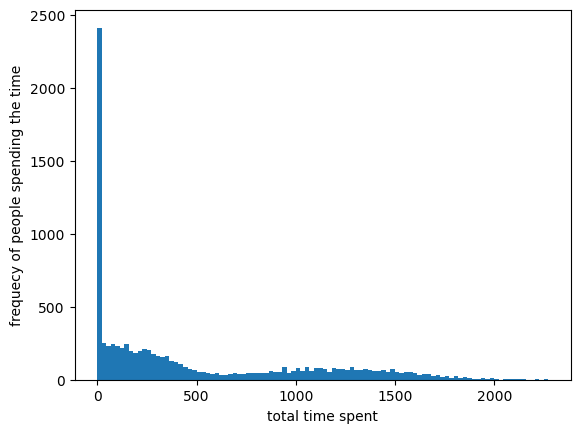

6073


In [7]:
x1 = df['Total Time Spent on Website']
plt.hist(x1,bins = 100)
plt.xlabel('total time spent')
plt.ylabel('frequecy of people spending the time')
plt.show()
cnt = 0
for i in x1:
    if i <= 500:
        cnt += 1
print(cnt)

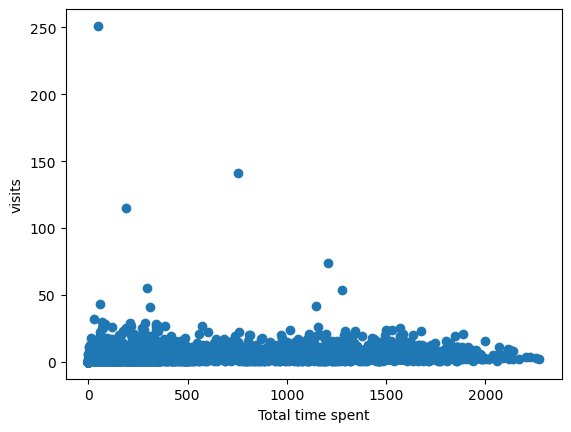

In [8]:
y1 = df['TotalVisits']
plt.scatter(x1, y1)
plt.xlabel('Total time spent')
plt.ylabel('visits')
plt.show()

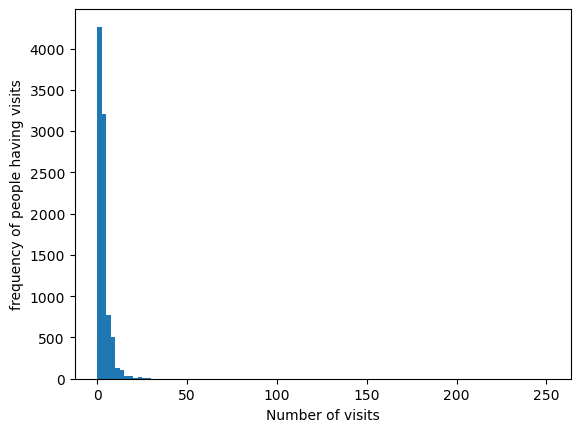

In [9]:
plt.hist(y1, bins=100)
plt.xlabel('Number of visits')
plt.ylabel('frequency of people having visits')
plt.show()

In [10]:
impute_mode.fit(df_cleaned[['TotalVisits']])
df_cleaned[['TotalVisits']] = impute_mode.transform(df_cleaned[['TotalVisits']])

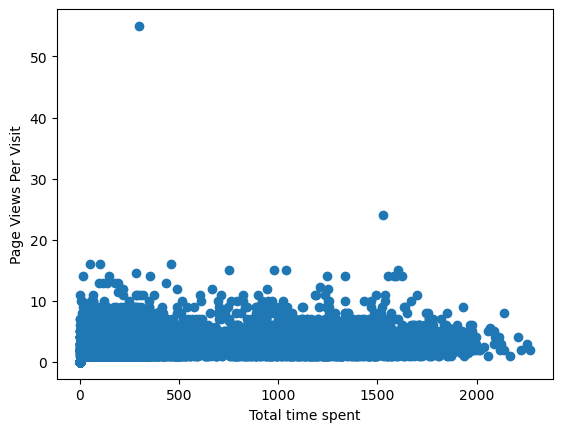

In [11]:
y2 = df_cleaned['Page Views Per Visit']
plt.scatter(x1, y2)
plt.xlabel('Total time spent')
plt.ylabel('Page Views Per Visit')
plt.show()

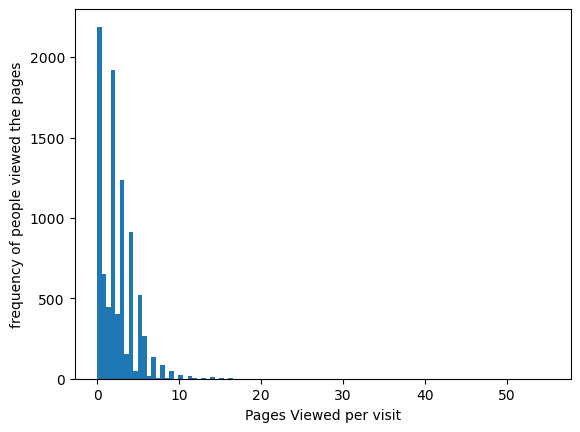

In [12]:
plt.hist(y2, bins=100)
plt.xlabel('Pages Viewed per visit')
plt.ylabel('frequency of people viewed the pages')
plt.show()

In [13]:
ind = y2.isna().index
val = abs(np.random.normal(y2.mean(),y2.std(),len(df)))
len(ind)
y2.fillna(pd.Series(val,ind),inplace = True)

In [14]:
df_cleaned['Lead Source'].replace('google','Google',inplace=True)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [16]:
df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [17]:
# df_cleaned = pd.get_dummies(df_cleaned, columns = ['Lead Origin', 'Lead Source','Last Activity','Last Notable Activity'])

In [18]:
df_cleaned = df_cleaned.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [19]:
def YesNoEncoding(df,col):
    for i in col:
        for j in range(len(df[i])):
            if(df[i][j] == 'No'):
                df[i][j] = 0
            else:
                df[i][j] = 1
    return df

In [20]:
# cl = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
# for i in cl:
#     df_cleaned[i] = df_cleaned[i].map({'Yes': 1, 'No': 0})

In [21]:
# df_cleaned.info()

In [22]:
df_cleaned = df_cleaned.drop(['Prospect ID','Lead Number'],axis = 1)

In [23]:
# X = df_cleaned.drop('Converted',axis=1)
# y = df_cleaned['Converted']

In [24]:
# X

In [25]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=scaler.fit_transform(X)

In [26]:
df_cleaned

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,No,No,No,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,No,No,No,No,No,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,No,No,No,No,No,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,No,No,No,No,No,No,No,SMS Sent


In [27]:
#### UNIVARIATE ANALYSIS

<AxesSubplot:>

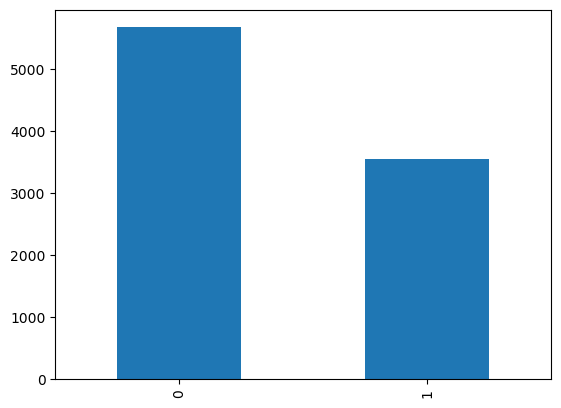

In [28]:
df_cleaned.Converted.value_counts().plot.bar()

In [29]:
categ_col = [column for column in df_cleaned.columns if df_cleaned.dtypes[column] =='object']
cont_col = [column for column in df_cleaned.columns if df_cleaned.dtypes[column] == 'float64' or df_cleaned.dtypes[column] == 'int64']

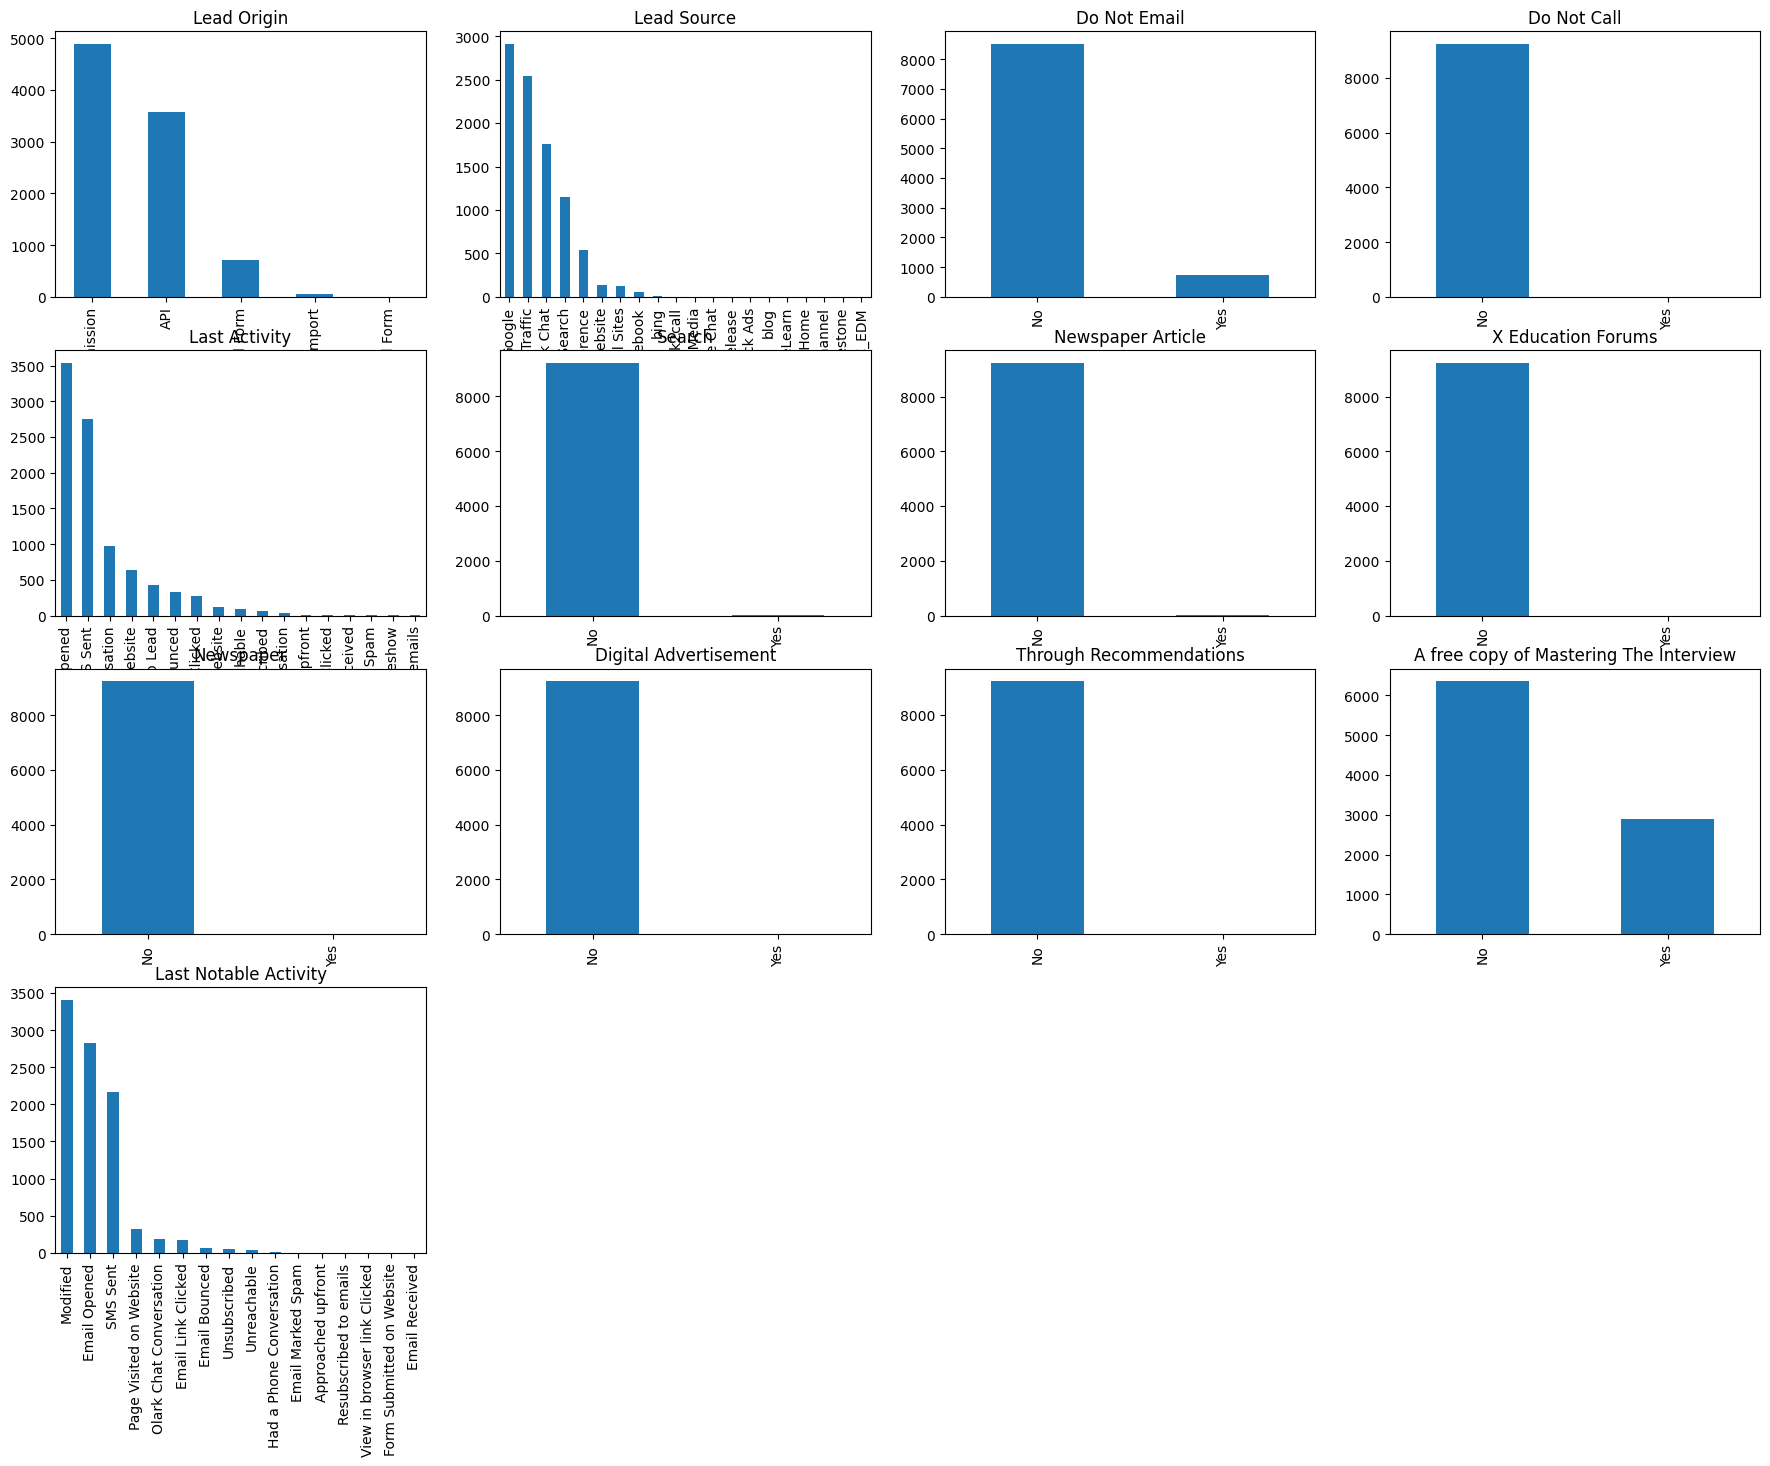

In [30]:
i=1
plt.figure(figsize=(22,20))
for column in categ_col:
    plt.subplot(5,4,i)
    df_cleaned[column].value_counts().plot.bar(title =column)
    i+=1
plt.show()

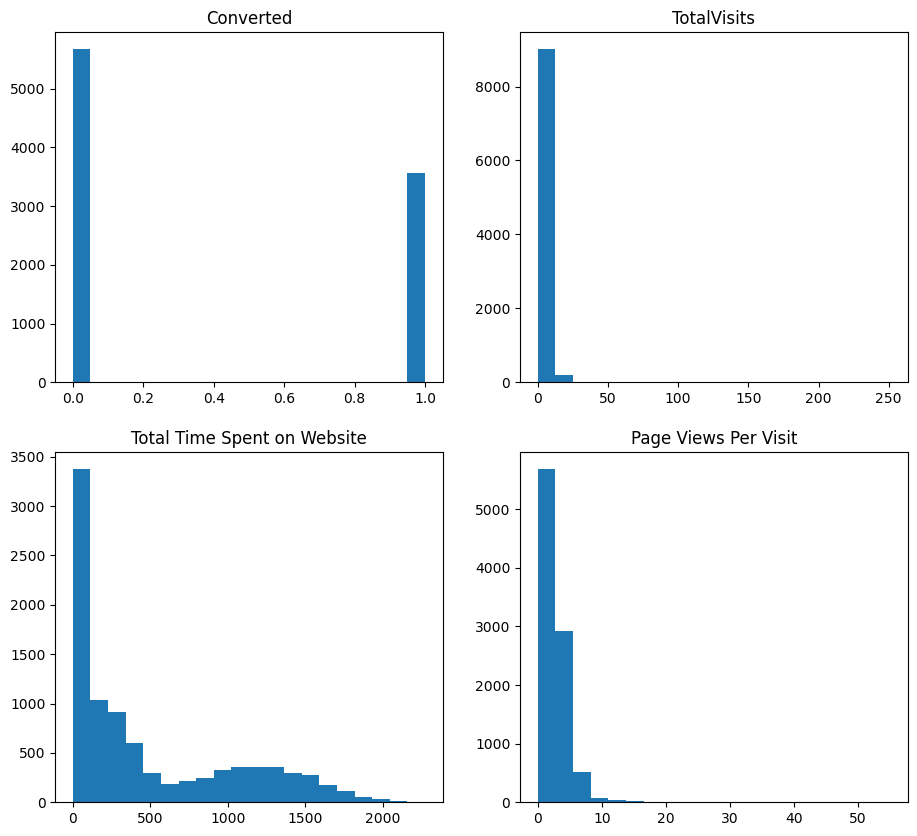

In [31]:
plt.figure(figsize = (11,10))
for i in range(1,len(cont_col)+1):
    plt.subplot(2,2,i)
    plt.hist(df_cleaned[cont_col[i-1]],bins = 20)
    plt.title(cont_col[i-1])

In [32]:
#### BIVARIATE ANALYSIS

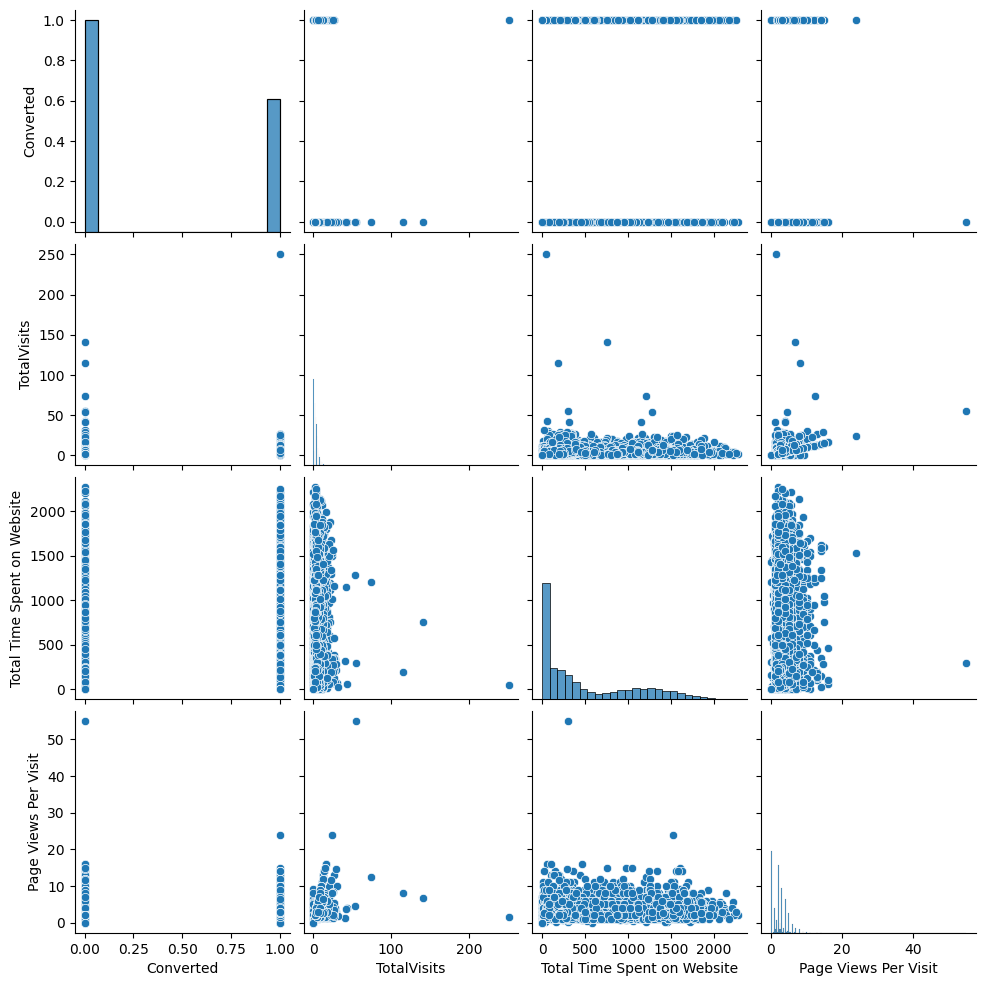

In [33]:
sns.pairplot(df_cleaned)

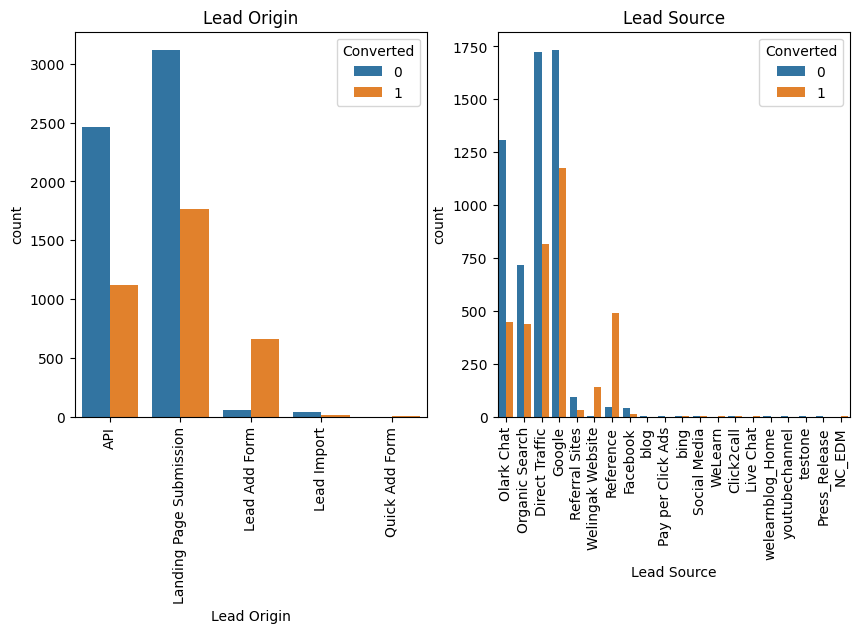

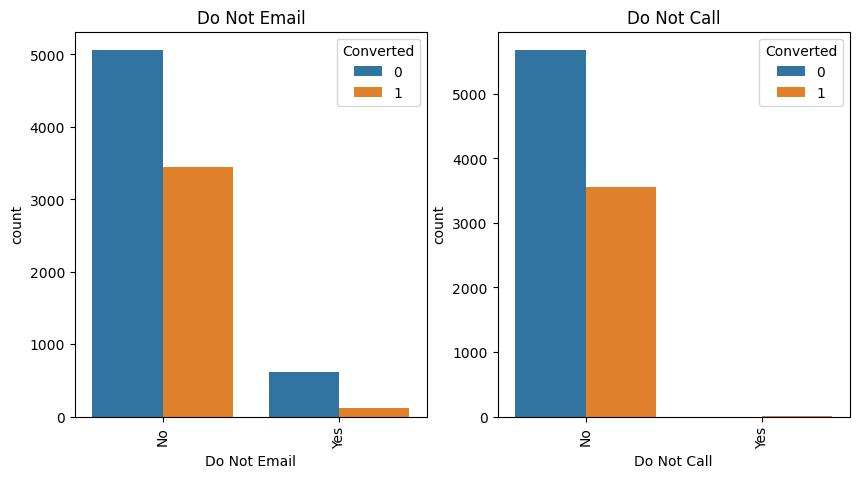

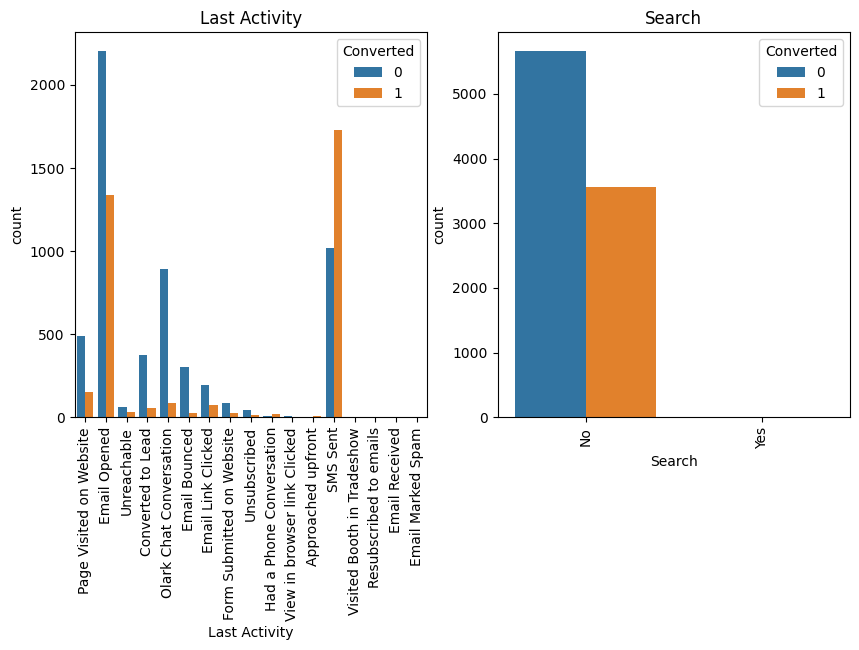

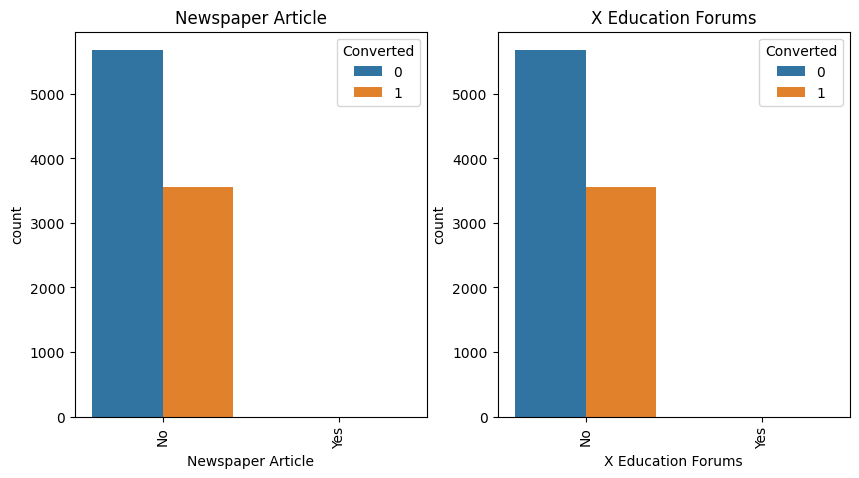

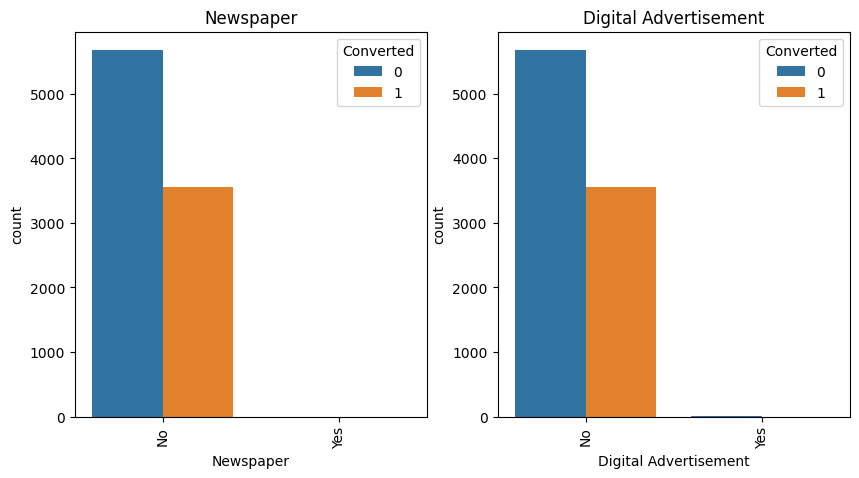

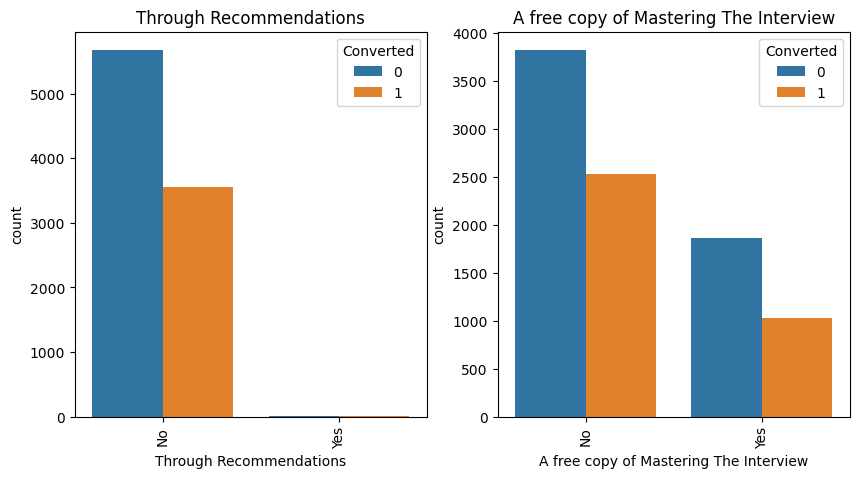

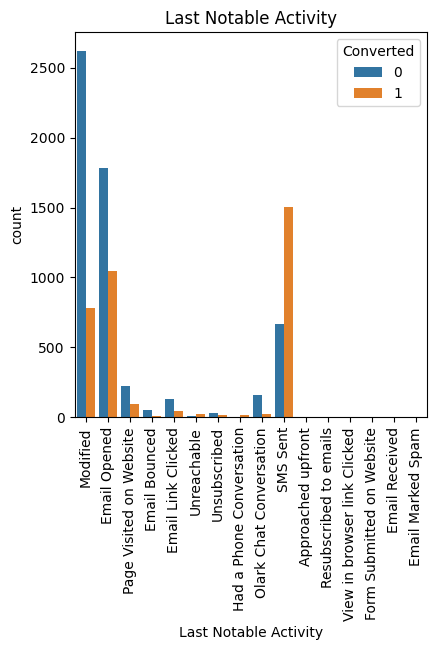

In [34]:
#plot categorical columns against converted
def plot_Category_Converted(features,cols):
    plt.figure(figsize=(10 ,5))
    i=1
    for feature in features:
        plt.subplot(1,cols,i)
        sns.countplot(x=feature, hue='Converted', data= df_cleaned).tick_params(axis='x', rotation = 90)
        plt.title(feature)
        i+=1
    plt.show()

def chunks(xs, n):
    n = max(1, n)
    return list(xs[i:i+n] for i in range(0, len(xs), n))
for lst in chunks(categ_col,2):
    plot_Category_Converted(lst,2)

In [35]:
#MULTIVARIATE ANALYSIS

In [36]:
# PLOTTING CORRELATION TABLE
df_cleaned.corr()

<ipython-input-36-fc06522d647f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.022502,0.362483,-0.000257
TotalVisits,0.022502,1.000000,0.209468,0.504998
Total Time Spent on Website,0.362483,0.209468,1.000000,0.317714
Page Views Per Visit,-0.000257,0.504998,0.317714,1.000000


<ipython-input-37-817b8d3b529b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df_cleaned.corr(),cmap = 'YlGnBu',annot = True)


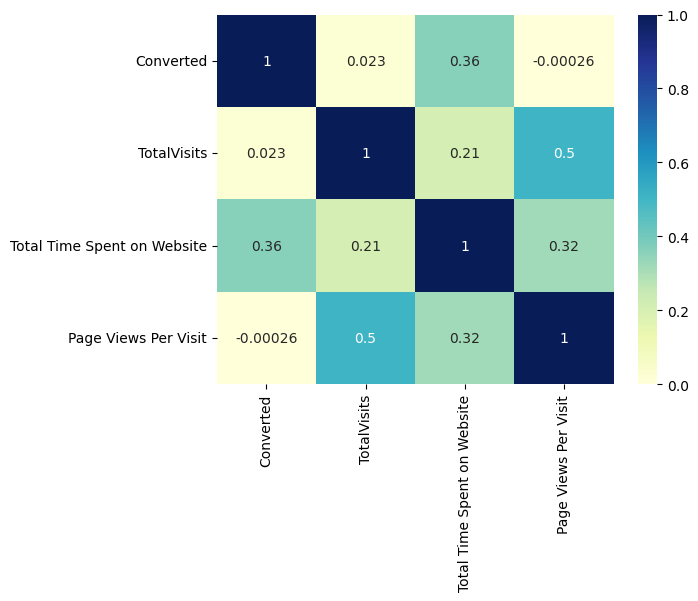

In [37]:
dataplot = sns.heatmap(df_cleaned.corr(),cmap = 'YlGnBu',annot = True)

In [38]:
### OUTLIERS TREATMENT 
continous_col = df_cleaned[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
continous_col.describe(percentiles=[0.01,0.1,0.25,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.369837
std,4.836682,548.021466,2.157778
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.330000
90%,7.000000,1380.000000,5.000000


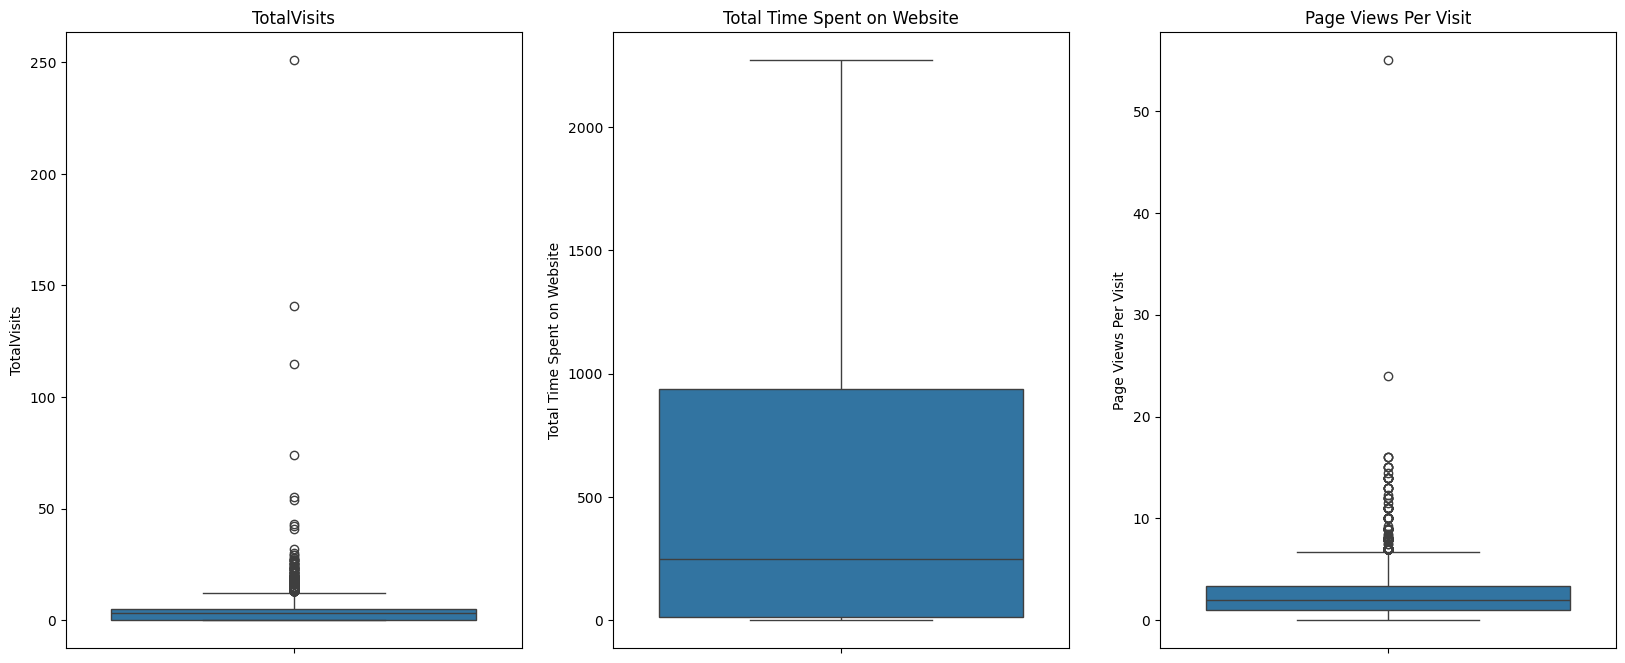

In [39]:
i = 1
plt.figure(figsize = (20,8))
for col in continous_col:
    plt.subplot(1,3,i)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    i+=1

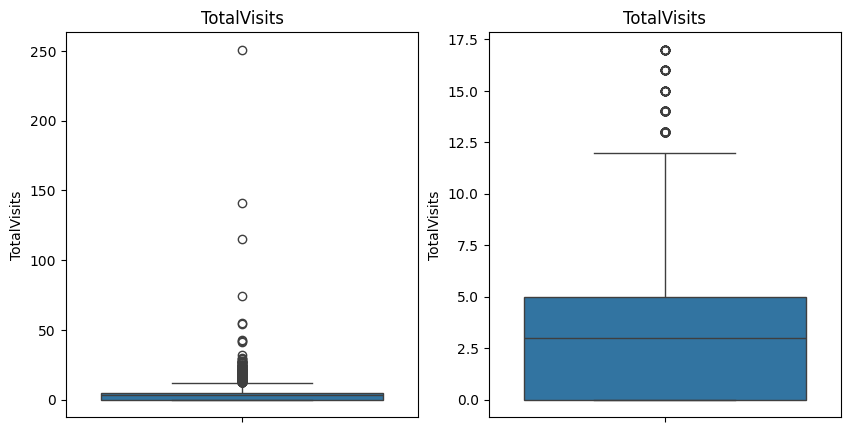

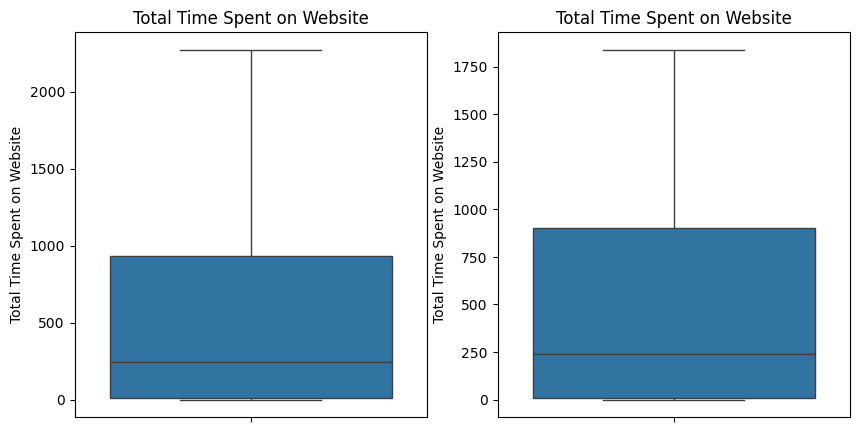

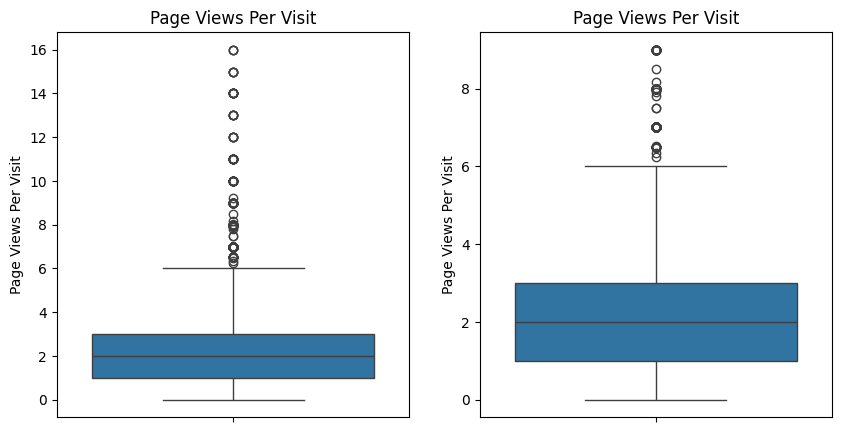

In [40]:
# REMOVE TOP AND BOTTOM 1% LEVELS OF THE BOX PLOT
for col in continous_col:
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.title(col)
    sns.boxplot(df_cleaned[col])
    upper_bound = df_cleaned[col].quantile(0.99)
    df_cleaned = df_cleaned[df_cleaned[col] <= upper_bound]
    lower_bound = df_cleaned[col].quantile(0.01)
    df_cleaned = df_cleaned[df_cleaned[col] >= lower_bound]
    plt.subplot(1,2,2)
    sns.boxplot(df_cleaned[col])
    plt.title(col)

In [41]:
dummies = pd.get_dummies(df_cleaned[categ_col],drop_first = True)
df_dummies = pd.concat([df_cleaned,dummies],axis=1)

In [42]:
df_dummies.drop(categ_col,axis=1,inplace=True)
df_dummies.shape

(8997, 65)

In [43]:
df_dummies.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
## MODELLING 
## TEST TRAIN SPLIT
from sklearn.model_selection import train_test_split
y = df_dummies['Converted']
X = df_dummies.drop(['Converted'],axis = 1)

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 104,test_size = 0.3,shuffle = True)

In [46]:
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,5.0,210,2.5,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9236,2.0,238,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,2.0,199,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,3.0,499,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
## Standardizing the continous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
173,1.368626,0.277264,2.511785,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8201,-0.363057,1.503434,-0.134355,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
357,-0.016720,-0.815176,0.394873,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1351,0.329616,-0.274606,0.924101,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4112,-1.055730,-0.881099,-1.192810,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
### MODEL BUILDING
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [49]:
## RFE Tells about the top 20 important features in model building which is important in prediction
Lr = LogisticRegression()
rfe = RFE(Lr,n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [50]:
## RANKINGS OF THE FEATURE , FEATURE SELECTED IS RANKED 1
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 32),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 11),
 ('Lead Source_blog', False, 45),
 ('Lead Source_testone', False, 30),
 ('Lead Source_welearnblog_Home', False, 21),
 ('Lead Source_youtubechannel', False, 24

In [51]:
rfe_support_cols = X_train.columns[rfe.support_]
rfe_support_cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unreachable', 'Newspaper_Yes',
       'Through Recommendations_Yes',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Call_Yes',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Act

In [53]:
import statsmodels.api as sm

In [54]:
X_train_rfe = X_train[rfe_support_cols]
X_train_sm = sm.add_constant(X_train_rfe)
model1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = model1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2752.9
Date:                Sat, 13 Jul 2024   Deviance:                       5505.9
Time:                        15:26:58   Pearson chi2:                 6.35e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3645
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [55]:
## DROPPING Lead Source_Welingak Website AND Newspaper_Yes due to high p values
X_train_rfe.drop(['Newspaper_Yes','Lead Source_Welingak Website','Lead Source_Reference','Last Notable Activity_Unreachable','Lead Source_Social Media'],axis=1,inplace = True)
X_train_sm = sm.add_constant(X_train_rfe)
model2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = model2.fit()
print(res.summary())

<ipython-input-55-257d70af35e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_rfe.drop(['Newspaper_Yes','Lead Source_Welingak Website','Lead Source_Reference','Last Notable Activity_Unreachable','Lead Source_Social Media'],axis=1,inplace = True)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6297
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.1
Date:                Sat, 13 Jul 2024   Deviance:                       5532.2
Time:                        15:26:59   Pearson chi2:                 6.51e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3618
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [56]:
## Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features"] = X_train_rfe.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
vif_data = vif_data.sort_values(by = "VIF",ascending = False)
vif_data

,Features,VIF
6,Last Activity_Olark Chat Conversation,2.002265
12,Last Notable Activity_Modified,1.975861
5,Last Activity_Email Bounced,1.822885
3,Do Not Email_Yes,1.811067
2,Lead Source_Olark Chat,1.687672
13,Last Notable Activity_Olark Chat Conversation,1.315241
4,Last Activity_Converted to Lead,1.252023
0,Total Time Spent on Website,1.197702
1,Lead Origin_Lead Add Form,1.106924
10,Last Notable Activity_Email Opened,1.101469


In [102]:
#### MODEL PREDICTIONS
y_train_pred = res.predict(X_train_sm)
y_train_pred

173     0.252819
8201    0.567981
357     0.116351
1351    0.499086
4112    0.625533
          ...   
6475    0.625533
9084    0.854269
751     0.286522
5975    0.463861
8484    0.499607
Length: 6297, dtype: float64

In [58]:
y_train

173     0
8201    0
357     0
1351    0
4112    1
       ..
6475    1
9084    1
751     1
5975    1
8484    0
Name: Converted, Length: 6297, dtype: int64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Probabilities':y_train_pred})
y_train_pred_final

,Converted,Probabilities
0,0,0.252819
1,0,0.567981
2,0,0.116351
3,0,0.499086
4,1,0.625533
...,...,...
6292,1,0.625533
6293,1,0.854269
6294,1,0.286522
6295,1,0.463861


In [60]:
## Set value for Predicted = 1 for probabilities > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Probabilities.map(lambda x : 1 if x > 0.5 else 0)
y_train_pred_final

,Converted,Probabilities,Predicted
0,0,0.252819,0
1,0,0.567981,1
2,0,0.116351,0
3,0,0.499086,0
4,1,0.625533,1
...,...,...,...
6292,1,0.625533,1
6293,1,0.854269,1
6294,1,0.286522,0
6295,1,0.463861,0


In [61]:
### MODEL EVALUATION
## Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion

array([[3411,  496],
       [ 776, 1614]], dtype=int64)

In [62]:
## Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.7979990471653168

In [63]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
print("Sensitivity",TP/(TP+FN))
print("Specificity",TN/(TN+FP))

Sensitivity 0.6753138075313807
Specificity 0.8730483747120553


In [64]:
## cutoff Optimization
from sklearn.metrics import roc_curve
from sklearn.metrics import  roc_auc_score
def draw_roc(actual,prob):
    fpr,tpr,threshold = roc_curve(actual,prob,drop_intermediate = False)
    auc_score = roc_auc_score(actual,prob)
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,label = auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positivity Rate')
    plt.ylabel('True Positivity Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

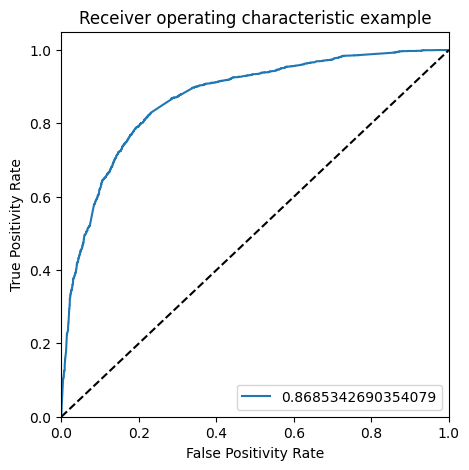

In [65]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Probabilities)

In [66]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Probabilities.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.252819,0,1,1,1,0,0,0,0,0,0,0
1,0,0.567981,1,1,1,1,1,1,1,0,0,0,0
2,0,0.116351,0,1,1,0,0,0,0,0,0,0,0
3,0,0.499086,0,1,1,1,1,1,0,0,0,0,0
4,1,0.625533,1,1,1,1,1,1,1,1,0,0,0


In [67]:
## Calculate Accuracy, Sensitivity and specificity for each cutoff probability threshold
cutoff = pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])
for i in nums:
    cf = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    tp = cf[1,1]
    tn = cf[0,0]
    fp = cf[0,1]
    fn = cf[1,0]
    sum = tp+tn+fp+fn
    acc = (tp+tn)/sum
    sen = tp/(tp+fn)
    spec = tn/(tn+fp)
    cutoff.loc[i] = [i,acc,sen,spec]
cutoff

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.379546,1.000000,0.000000
0.1,0.1,0.565507,0.971967,0.316867
0.2,0.2,0.726378,0.910042,0.614026
0.3,0.3,0.791806,0.824268,0.771948
0.4,0.4,0.801334,0.760669,0.826209
0.5,0.5,0.797999,0.675314,0.873048
0.6,0.6,0.789741,0.595397,0.908626
0.7,0.7,0.761315,0.455230,0.948554
0.8,0.8,0.739717,0.362343,0.970566
0.9,0.9,0.679212,0.173222,0.988738


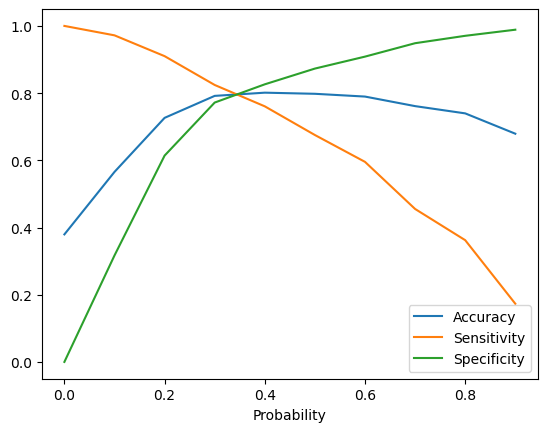

In [68]:
cutoff.plot.line(x = 'Probability',y = ['Accuracy','Sensitivity','Specificity'])
plt.show()

In [69]:
## cutoff probability is 0.35
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Probabilities.map(lambda x:1 if x > 0.35 else 0)
y_train_pred_final

,Converted,Probabilities,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.252819,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.567981,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.116351,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.499086,0,1,1,1,1,1,0,0,0,0,0,1
4,1,0.625533,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6292,1,0.625533,1,1,1,1,1,1,1,1,0,0,0,1
6293,1,0.854269,1,1,1,1,1,1,1,1,1,1,0,1
6294,1,0.286522,0,1,1,1,0,0,0,0,0,0,0,0
6295,1,0.463861,0,1,1,1,1,1,0,0,0,0,0,1


In [70]:
cf_final = confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Final_Predicted)
cf_final

array([[3104,  803],
       [ 476, 1914]], dtype=int64)

In [71]:
tpf = cf_final[1,1]
tnf = cf_final[0,0]
fpf = cf_final[0,1]
fnf = cf_final[1,0]
print('Final Accuracy =',(tpf+tnf)/(tpf+tnf+fpf+fnf))
print('Final Sensitivity =',(tpf)/(tpf+fnf))
print('Final Specificity =',tnf/(tnf+fpf))

Final Accuracy = 0.796887406701604
Final Sensitivity = 0.800836820083682
Final Specificity = 0.794471461479396


In [72]:
### TEST SET PREDICTIONS

In [73]:
# Transforming numerical values into standardized values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [74]:
cols = X_train_rfe.columns
X_test_rfe = X_test[cols]
X_test_sm = sm.add_constant(X_test_rfe)

In [75]:
y_test_pred = res.predict(X_test_sm)

In [76]:
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_pred_final = pd.concat([y_pred_df,y_test_df],axis = 1)
y_pred_final = y_pred_final.rename(columns = {0:'Conversion_Probability'})
y_pred_final

,Conversion_Probability,Converted
0,0.214545,0
1,0.085084,0
2,0.896834,1
3,0.896592,1
4,0.158215,0
...,...,...
2695,0.367001,1
2696,0.402364,1
2697,0.161576,0
2698,0.286522,1


In [77]:
y_pred_final['Predictions'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Conversion_Probability,Converted,Predictions
0,0.214545,0,0
1,0.085084,0,0
2,0.896834,1,1
3,0.896592,1,1
4,0.158215,0,0
...,...,...,...
2695,0.367001,1,1
2696,0.402364,1,1
2697,0.161576,0,0
2698,0.286522,1,0


In [78]:
test_cf = confusion_matrix(y_pred_final.Converted,y_pred_final.Predictions)
test_cf

array([[1334,  324],
       [ 206,  836]], dtype=int64)

In [79]:
accuracy_score(y_pred_final.Converted,y_pred_final.Predictions)

0.8037037037037037

In [80]:
tp_test = test_cf[1,1]
tn_test = test_cf[0,0]
fp_test = test_cf[0,1]
fn_test = test_cf[1,0]
acc_test = accuracy_score(y_pred_final.Converted,y_pred_final.Predictions)
sense_test = tp_test/(tp_test+fp_test)
specific_test = tn_test/(tn_test+fn_test)
print('Accuracy =',acc_test)
print('sensitivity =',sense_test)
print('specificity =',specific_test)
precision_test = tp_test/(tp_test+fp_test)
recall_test = tp_test/(tp_test+fn_test)
print('precision =',precision_test)
print('recall =',recall_test)

Accuracy = 0.8037037037037037
sensitivity = 0.7206896551724138
specificity = 0.8662337662337662
precision = 0.7206896551724138
recall = 0.8023032629558541


In [81]:
## precision recall curve to improve precision of the model
from sklearn.metrics import precision_recall_curve

In [82]:
for i in nums:
    y_pred_final[i] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)

In [83]:
y_pred_final

,Conversion_Probability,Converted,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.214545,0,0,1,1,1,0,0,0,0,0,0,0
1,0.085084,0,0,1,0,0,0,0,0,0,0,0,0
2,0.896834,1,1,1,1,1,1,1,1,1,1,1,0
3,0.896592,1,1,1,1,1,1,1,1,1,1,1,0
4,0.158215,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.367001,1,1,1,1,1,1,0,0,0,0,0,0
2696,0.402364,1,1,1,1,1,1,1,0,0,0,0,0
2697,0.161576,0,0,1,1,0,0,0,0,0,0,0,0
2698,0.286522,1,0,1,1,1,0,0,0,0,0,0,0


In [84]:
p,r,threshold = precision_recall_curve(y_pred_final.Converted,y_pred_final.Conversion_Probability)

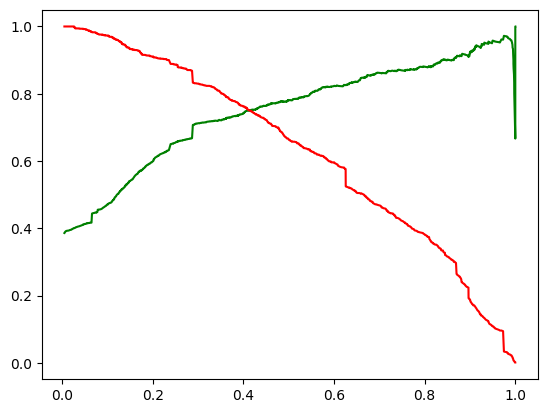

In [85]:
plt.plot(threshold, p[:-1], "g-")
plt.plot(threshold, r[:-1], "r-")
plt.show()

In [86]:
## Test threshold probability as 0.41
y_pred_final['final_predictions'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Conversion_Probability,Converted,Predictions,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predictions
0,0.214545,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0.085084,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.896834,1,1,1,1,1,1,1,1,1,1,1,0,1
3,0.896592,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0.158215,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.367001,1,1,1,1,1,1,0,0,0,0,0,0,0
2696,0.402364,1,1,1,1,1,1,1,0,0,0,0,0,0
2697,0.161576,0,0,1,1,0,0,0,0,0,0,0,0,0
2698,0.286522,1,0,1,1,1,0,0,0,0,0,0,0,0


In [87]:
cfm = confusion_matrix(y_pred_final.Converted,y_pred_final.final_predictions)
tp_tst = cfm[1,1]
tn_tst = cfm[0,0]
fp_tst = cfm[0,1]
fn_tst = cfm[1,0]
acc_tst = accuracy_score(y_pred_final.Converted,y_pred_final.final_predictions)
sense_tst = tp_tst/(tp_tst+fp_tst)
specific_tst = tn_tst/(tn_tst+fn_tst)
print('Accuracy =',acc_tst)
print('sensitivity =',sense_tst)
print('specificity =',specific_tst)
precision_tst = tp_tst/(tp_tst+fp_tst)
recall_tst = tp_tst/(tp_tst+fn_tst)
print('precision =',precision_tst)
print('recall =',recall_tst)

Accuracy = 0.807037037037037
sensitivity = 0.7492822966507177
specificity = 0.8435045317220544
precision = 0.7492822966507177
recall = 0.7514395393474088


In [124]:
print("All Relevant features","count",X_train_rfe.shape[1])
for col in X_train_rfe.columns:
    print(col)

All Relevant features count 15
Total Time Spent on Website
Lead Origin_Lead Add Form
Lead Source_Olark Chat
Do Not Email_Yes
Last Activity_Converted to Lead
Last Activity_Email Bounced
Last Activity_Olark Chat Conversation
Last Activity_Unreachable
Through Recommendations_Yes
Last Notable Activity_Email Link Clicked
Last Notable Activity_Email Opened
Last Notable Activity_Had a Phone Conversation
Last Notable Activity_Modified
Last Notable Activity_Olark Chat Conversation
Last Notable Activity_Page Visited on Website


In [125]:
### MODEL DEPLOYMENT
import pickle
pickle.dump(res,open('model.pkl','wb'))

In [126]:
model=pickle.load(open('model.pkl','rb'))

In [129]:
pred=model.predict([[1,0.5,0,1,0,0,0,1,0,0,0,0,0,0,1,0],[1,5,0,1,0,0,0,1,0,0,0,0,0,0,1,0]])

In [130]:
pred

array([0.27933159, 0.98259249])